In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
adm=pd.read_csv(r'C:\Users\rohan\Downloads\university_admission.txt',delimiter=',',names=['Marks1','Marks2','Admission'])

In [3]:
adm.head()

,Marks1,Marks2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


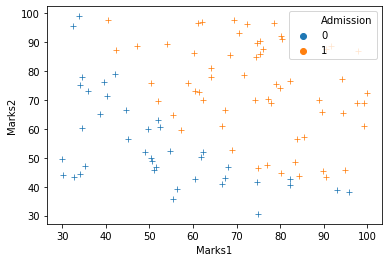

In [4]:
sns.scatterplot(adm.Marks1,adm.Marks2,hue=adm.Admission,marker="+")

In [5]:
X1=adm['Marks1']
X2=adm['Marks2']
Y=adm['Admission']
M=len(Y)

In [6]:
def hypfunction(theta0,theta1,theta2,i):
    Htheta=theta0+theta1*X1[i]+theta2*X2[i]
    sg=(1/(1+(math.exp(-Htheta))))
    return sg

In [13]:
def costFunction(theta0,theta1,theta2):
    Cost=0
    for i in range(M):
        cost=(-1/M)*((Y[i])*(math.log2(hypfunction(theta0,theta1,theta2,i)))+(1-Y[i])*(math.log2(1-hypfunction(theta0,theta1,theta2,i))))
        Cost=Cost+cost
    return Cost

In [23]:
theta0,theta1,theta2,alpha=0,0,0,0.00001
a=1
index=[]
costArray=[]
while(a<1000):
    J=0
    K=0
    L=0
    for i in range(M):
        j=alpha*(1/M)*((hypfunction(theta0,theta1,theta2,i)-Y[i]))
        J=J+j
        k=alpha*(1/M)*((hypfunction(theta0,theta1,theta2,i)-Y[i])*X1[i])
        K=K+k
        l=alpha*(1/M)*((hypfunction(theta0,theta1,theta2,i)-Y[i])*X2[i])
        L=L+l
    theta_0=theta0-J
    theta_1=theta1-K
    theta_2=theta2-L
    if(costFunction(theta0,theta1,theta2)<=costFunction(theta_0,theta_1,theta_2)):
        break
    else:
        theta0=theta_0
        theta1=theta_1
        theta2=theta_2
        index.append(a)
        a=a+1
        costArray.append(costFunction(theta0,theta1,theta2))

In [24]:
print(costArray)

[0.9961332673872646, 0.9924392233325383, 0.9889101190406366, 0.9855385348106529, 0.9823173691418245, 0.979239827799341, 0.9762994129000372, 0.9734899120700111, 0.970805387719008, 0.9682401664698027, 0.9657888287748884, 0.9634461987473558, 0.9612073342280686, 0.9590675171068811, 0.957022243911848, 0.9550672166769391, 0.953198334095831, 0.9514116829666633, 0.9497035299304325, 0.948070313503668, 0.9465086364043531, 0.9450152581686124, 0.9435870880544336, 0.9422211782276851, 0.9409147172248182, 0.9396650236859623, 0.9384695403515484, 0.9373258283151756, 0.9362315615250903, 0.9351845215264163, 0.9341825924361313, 0.9332237561426732, 0.9323060877220513, 0.9314277510623635, 0.9305869946886725, 0.9297821477803057, 0.9290116163727918, 0.9282738797367774, 0.9275674869264672, 0.926891053490316, 0.9262432583369162, 0.925622840749229, 0.9250285975405366, 0.9244593803457211, 0.9239140930416984, 0.9233916892910704, 0.9228911702032812, 0.9224115821077942, 0.9219520144340231, 0.9215115976929789, 0.9210

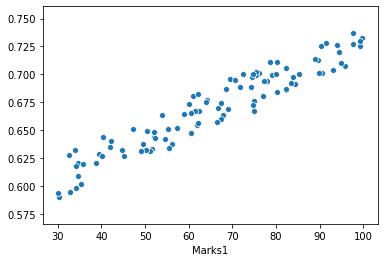

In [31]:
ABC=[]
for i in range(M):
    abc=hypfunction(theta0,theta1,theta2,i)
    ABC.append(abc)
sns.scatterplot(X1,ABC)

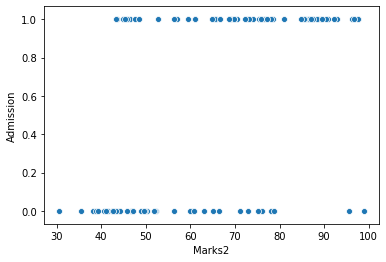

In [11]:
sns.scatterplot(X2,Y)

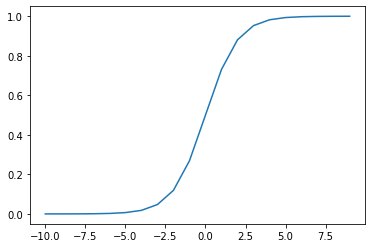

In [12]:
sig=[]
for i in range(-10,10):
    sg=(1/(1+(math.exp(-i))))
    sig.append(sg)
sns.lineplot(np.arange(-10,10),sig)